## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


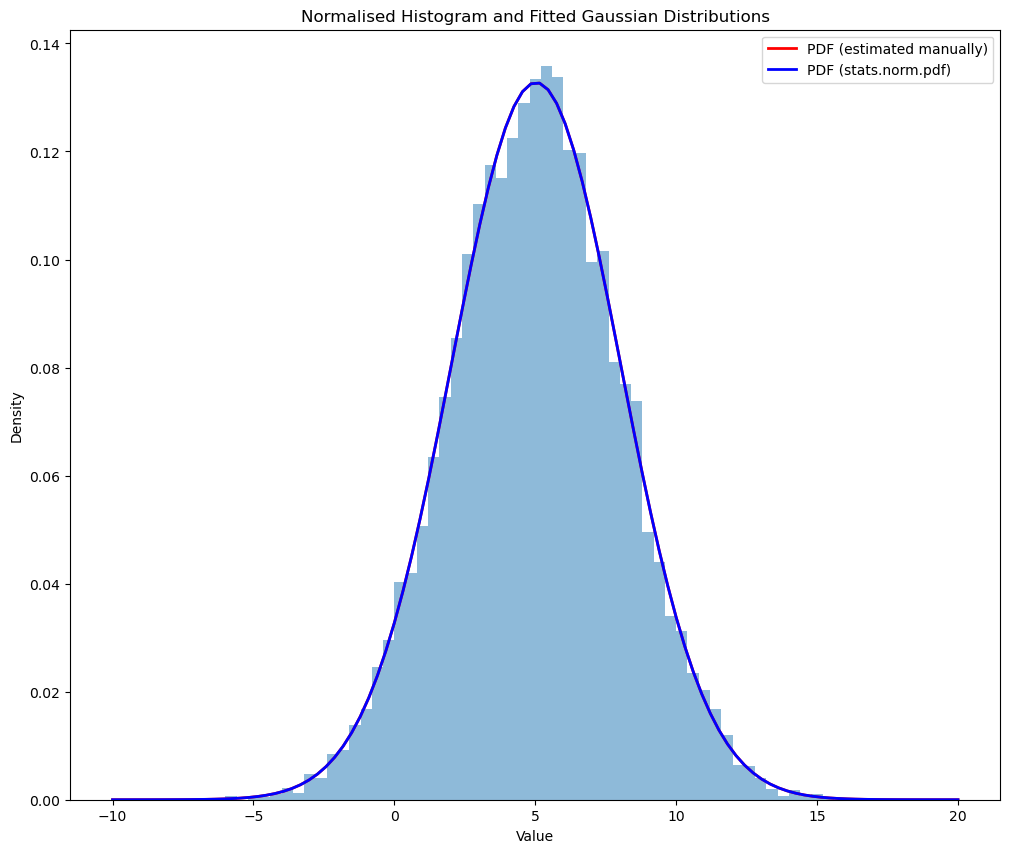

Mean is : 5.027152443622421
Variance is : 9.028667318774586


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

val = np.array(np.load('./clean_data.npy')).flatten()
N = val.size

#MLE estimator for mean and variance
mean_mle = np.sum(val) / N
var_mle = np.sum((val - mean_mle)**2) / N

#Mean and variance calculated in numpy to verify mle estimation above
mean_estimate = np.mean(val)
var_estimate = np.var(val)

#pdf calculated both with mle formula from reader and using scipy function (gives same result).
x = np.linspace(-10, 20, 100)
p_mle = (1 / (np.sqrt(2 * np.pi) * np.sqrt(var_mle))) * np.exp(-(x - mean_mle)**2 / (2 * np.sqrt(var_mle)**2))
pdf = stats.norm.pdf(x, mean_estimate, np.sqrt(var_estimate))
                     
plt.figure(figsize=(12,10))
plt.hist(val, bins=75, range=(-10,20), density=True, alpha=0.5)
plt.plot(x, p_mle, 'r', linewidth=2, label='PDF (estimated manually)')
plt.plot(x, pdf, 'b', linewidth=2, label='PDF (stats.norm.pdf)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normalised Histogram and Fitted Gaussian Distributions')
plt.legend(loc="upper right")
plt.show()

print("Mean is :", mean_mle)   
print ("Variance is :", var_mle)

#### Gaussian fit to data
- I have used the 'scipy.stats.norm.pdf' combined with the estimated mean and variance from numpy to calcuate a pdf curve but also found the estimated mean and variance from maximum likelihood estimator formulas and plotted the pdf curve for this which is the blue curve.
- These both gave the exact same curve as observed above.

# 

1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

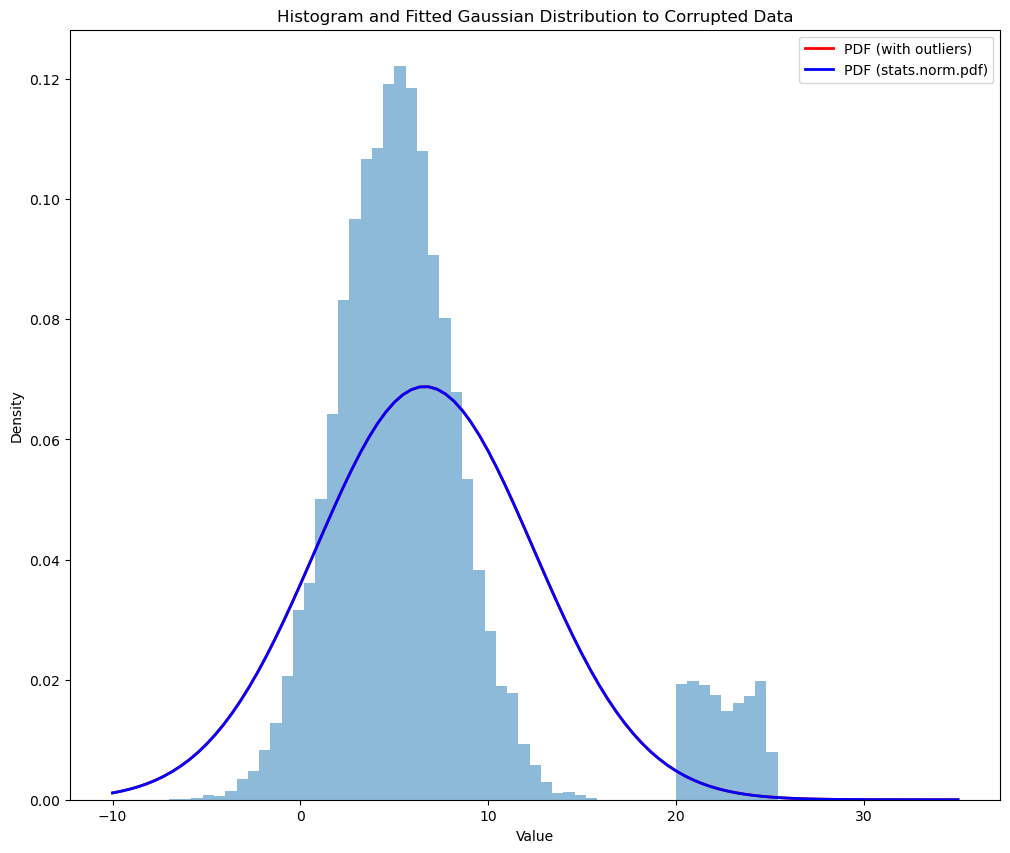

Mean is : 6.614508398212064
Variance is : 33.61185712302579


In [2]:
import numpy as np
import matplotlib.pyplot as plt

val_corrupt = np.load('./corrupted_data.npy').flatten()
N = val_corrupt.size

#mean and variance calculated using the ml estimator
mu_corrupt = np.sum(val_corrupt) / N
variance_corrupt = np.var(val_corrupt)
std_corrupt = np.sqrt(variance_corrupt)

#pdf calculated both with formula from reader and using scipy function.
x_corrupt = np.linspace(-10, 35, 100)
p_mle_corrupt = (1 / (np.sqrt(2 * np.pi) * std_corrupt)) * np.exp(-(x_corrupt - mu_corrupt)**2 / (2 * std_corrupt**2))
pdf_corrupt = stats.norm.pdf(x_corrupt, mu_corrupt, std_corrupt)

#plot histogram and gaussian
plt.figure(figsize=(12,10))
plt.hist(val_corrupt, bins=75, range=(-10,35), density=True, alpha=0.5)
plt.plot(x_corrupt, p_mle_corrupt, 'r', linewidth=2, label='PDF (with outliers)')
plt.plot(x_corrupt, pdf_corrupt, 'b', linewidth=2, label='PDF (stats.norm.pdf)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Fitted Gaussian Distribution to Corrupted Data')
plt.legend(loc="upper right")
plt.show()

print("Mean is :", mu_corrupt) 
print ("Variance is :", variance_corrupt)

### 1.2 Change of Mean and Variance
- In the corrupted data the estimated mean has increased. This is due to there being much higher values in the sum of all values when calculating the mean. The effect this has on the probability density function is shown above where the blue line is the new PDF from the corrupted data. The estimated mean increasing has caused the peak to be shifted to the right, in the direction of the outliers. Note that the increase in mean is not massive and doesn't nessecarily give a whole new meaning of the data.

- The variance has increased massively compared to the clean data. This is due to the large outliers causing the spread of the data to be much larger than before. Unlike the mean, the variance is massively impacted by the outliers. This is due to it representing the spread and the outliers making the data seem much more spread out than it is. As variance calculates the difference between data points and the mean, the outliers that are far from the mean will lead to a significant impact seen in the blue line which is now significantly wider showing a larger stretched spread compared to 1.1 for the clean data.

- These results prove and show how a Gaussian distribution fit using Maximum Likelihood Estimation (MLE) is extremely sensitive to outliers and noise.

#

1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

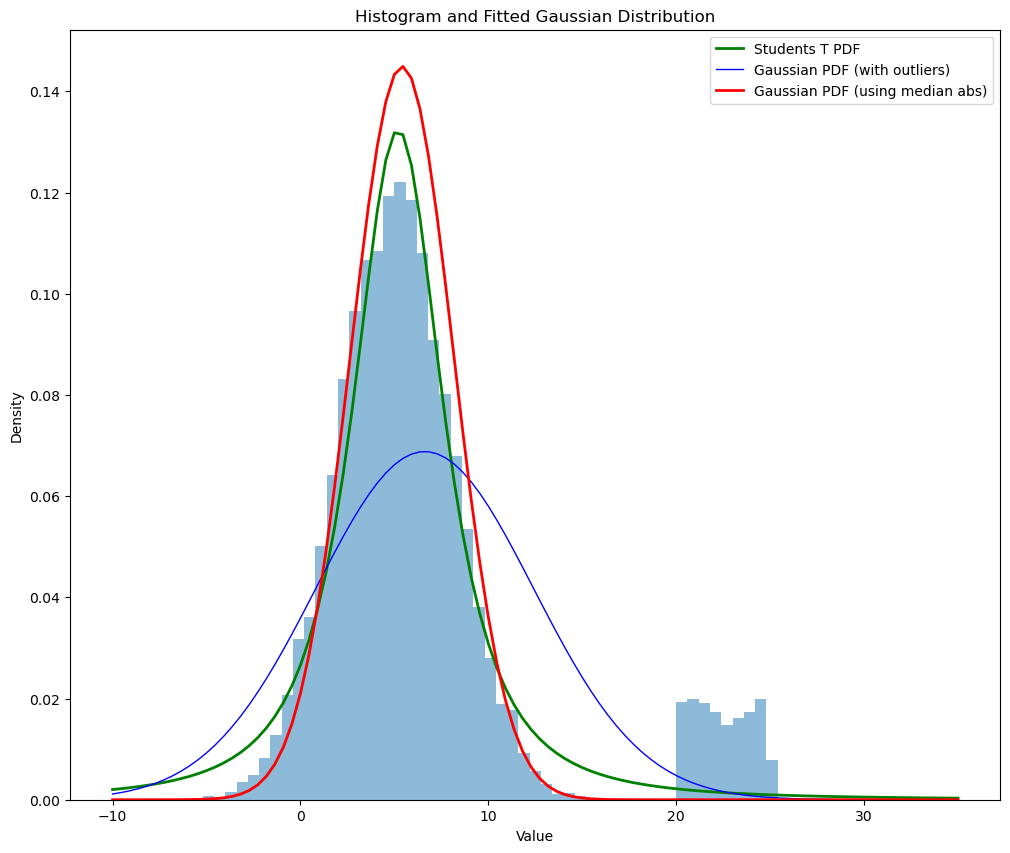

For median absolute deviation (red line), 
Median is :  5.410667961396163 Variance is:  7.575757575757575 

For students T distribution (green line), 
Mean is:  5.19913884945735 Variance is : 7.008498048801613 

For gaussian pdf including outliers using mle (blue line), 
Mean is: 6.614508398212064 Variance is:  33.61185712302579


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

val_robust = np.load('./corrupted_data.npy').flatten()
N = val_robust.size

#calculate meidan and median abs deviation
mu_robust = np.median(val_robust)
med_abs_deviation = np.median(np.absolute(x - np.median(x)))
sqr_med = np.sqrt(med_abs_deviation)

#Calculate pdf with use of median instead of mean
x_robust = np.linspace(-10, 35, 100)
pdf_robust = stats.norm.pdf(x_robust, mu_robust, sqr_med)

#Calculate students T distirbution
params = stats.t.fit(val_corrupt)
df, loc, scale = params
x = np.linspace(-10, 35, 100)
pdf = stats.t.pdf(x, df, loc, scale)

#Plot all 3 for comparison.
plt.figure(figsize=(12,10))
plt.hist(val_robust, bins=75, range=(-10,35), density=True, alpha=0.5)
plt.plot(x, pdf, 'g', linewidth=2, label='Students T PDF')
plt.plot(x_corrupt, p_mle_corrupt, 'b', linewidth=1, label='Gaussian PDF (with outliers)')
plt.plot(x_robust, pdf_robust, 'r', linewidth=2, label='Gaussian PDF (using median abs)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Fitted Gaussian Distribution')
plt.legend(loc="upper right")
plt.show()

mean_t = stats.t.mean(df, loc=loc, scale=scale)
var_t = scale**2

print("For median absolute deviation (red line), \nMedian is : ", mu_robust, "Variance is: ", med_abs_deviation, '\n')
print("For students T distribution (green line), \nMean is: ",mean_t ,"Variance is :" ,var_t, '\n') 
print("For gaussian pdf including outliers using mle (blue line), \nMean is:", mu_corrupt, "Variance is: ", variance_corrupt)


### 1.3 Approaches to robustness

##### Students T
The students T distribution is robust to the outliers due to it having heavier tails. This is because it assigns less probability to an extreme value and this decreases it's sensitivity to outliers and makes them less impactful on the distribution.

##### Median Absolute Deviation
The median of a set of data is less impacted by outliers than the mean is, for this reason it makes sense to replace the mean with the median. This is shown by the red line that is hardly impacted by the outliers.

##### Comparison
- The table below shows the differences in mean and variance from the original data set in 1.1, corrupted data in 1.2 and the 2 methods of robustness shown above. 
- It clearly shows the impact of the outliers in 1.2 and shows the two methods of robustness effectively minimising their impact. 
- The table does not give a complete judgement as to which method is the best for creating robustness.
- However, as it is the more commonly used method for data that shows gaussian properties but has outliers, I would have to say the T students distribution is better for this specific application. Also, if more and more outliers were to be added, there is a chance the median absolute deviation may begin giving inaccurate results.

| Distribution| Mean        | Variance   |
| ----------- | ----------- |---------   |
| Original Data (1.1)      | 5.027       |9.029       |
| Corrupted Data (1.2)  | 6.614        |33.611       |
| Students T (1.3)  | 5.200        |7.008       |
| Median Abs Dev (1.3)  | 5.411        |7.576       |

##### Extra Note
It should be noted that another method of preventing the outliers from affecting the distribution could be to use bayesian inference and make a reasonable prior probability estimation from some prior knowledge of the distribution and what it should be. I chose to explore other options like the students T but completely aware of the benefit using bayesian inference would have.

# 

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size (N×3) that has been reshaped into a vector of size (N∗3×1)

. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the "explained variance" (not singular values) associated with each of the eigenvectors.

**(5 marks)**

Shape of transformed coordinate space =  (7, 3) 

Eigenvectors (3X1845): 
 [[-0.00414581 -0.05745345 -0.03575951 ...  0.0376639  -0.03702778
   0.03551194]
 [-0.01415561  0.05170192 -0.05249313 ...  0.01730634 -0.0125189
  -0.03141247]
 [-0.00842216 -0.05345479 -0.01210247 ...  0.00258984  0.04529302
  -0.0158867 ]] 

Explained Variance Ratio for each eigenvector:
 [0.62491256 0.21013105 0.07890197]
(7, 3)


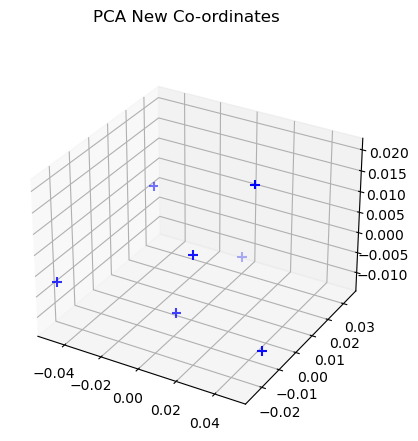

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Load in array of shapes, originally 1845 Rows, 7 columns
shape_array = np.load('./shape_array.npy')

#Transpose array to perform PCA. 7 rows and 1845 columns reduced to just 3 principal components.bb
shape_array = shape_array
pca = PCA(n_components=3)
pca.fit(shape_array.T)
pca_coordinates = pca.transform(shape_array.T)

#Show the reduction of dimensions
print("Shape of transformed coordinate space = ", pca_coordinates.shape, "\n")

#Extract eigenvectors(components) and explained variance
eigenvecs = pca.components_
explained_variance = pca.explained_variance_ratio_
print("Eigenvectors (3X1845): \n", eigenvecs, "\n")
print("Explained Variance Ratio for each eigenvector:\n", explained_variance)

#Plot Principal Components in new 3D co-ordinate space
x = pca_coordinates[:, 0]
y = pca_coordinates[:, 1]
z = pca_coordinates[:, 2]
fig = plt.figure()
fig.suptitle('PCA New Co-ordinates', fontsize=12)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='+', s=50)
print(pca_coordinates.shape)

### PCA
- Using the PCA function, found 3 principal components to explain close to 90% of the data and it made sense to reduce to 3 dimensions for the ease of plotting the new coordinate system.
- Kept consistent below when manually doing eigendecomposition.

# 

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the "explained variance" (not singular values) estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

Explained Variance Ratio from PCA:
 [0.62491155 0.2101307  0.07890199] 

Eigenvalues from eigendecompisition: 
 [0.00097705+0.j 0.00032854+0.j 0.00012336+0.j] 

New coordinate space defined by selected eigenvectors:  (7, 3) 



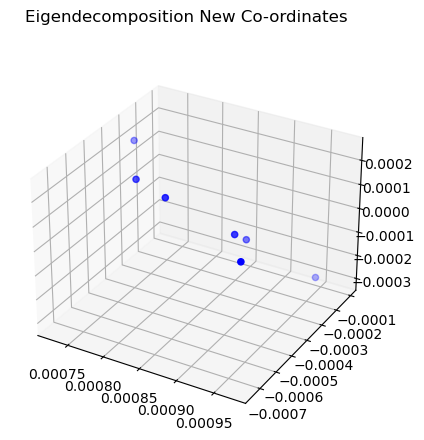

In [5]:
import numpy as np

#Calculate mean and minus from data to centre.
mu = np.mean(shape_array, axis=1)
centered_data = shape_array - mu[:, np.newaxis]

#Calculate covariance matrix and find eigenvectors & eigenvalues
covar = np.cov(centered_data, bias=True)
eigenvalues, eigenvectors = np.linalg.eig(covar)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

num_components = 3
selected_eigenvectors = eigenvectors[:num_components]
selected_eigenvals = eigenvalues[:num_components]

print("Explained Variance Ratio from PCA:\n", explained_variance, '\n')
print("Eigenvalues from eigendecompisition: \n", (selected_eigenvals), '\n')

#Calculate the new coordinates in the new coordinate space
transformed_eigen = np.dot(selected_eigenvectors, shape_array)
print("New coordinate space defined by selected eigenvectors: ", transformed_eigen.T.shape, '\n')

fig = plt.figure()
fig.suptitle('Eigendecomposition New Co-ordinates', fontsize=12)
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(np.real(transformed_eigen[0, :]), np.real(transformed_eigen[1, :]), np.real(transformed_eigen[2, :]), c='blue', marker='o')
plt.show()

#### Explanation of Results
- The explained variance ratio obtained from PCA and eigenvalues from eigendecomposition both represent the variability of the data but in slightly different ways.
- The explained variance ratio computes the eigenvalues from the covariance matrix of the data but normalises it by making it sum up to 1. This means the 3 values given represent a percentage of the variance that is explained by each component and therefore the significance of that component.
- The eigenvalues from the eigendecomposition of the covariance matrix just gives the raw values of the eiegenvalues without the normalising to 1 that occurs in the PCA variance ratio. As seen below, if you do indeed normalise each of the selected eigenvalues, you can obtain values really close to that of the PCA ratio.

In [6]:
sel_eigenvalues_norm = selected_eigenvals / sum(selected_eigenvals)
print("Eigenvalues from eigendecomposition (normalised): \n", sel_eigenvalues_norm, '\n')


Eigenvalues from eigendecomposition (normalised): 
 [0.6837525+0.j 0.2299163+0.j 0.0863312+0.j] 



# 

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

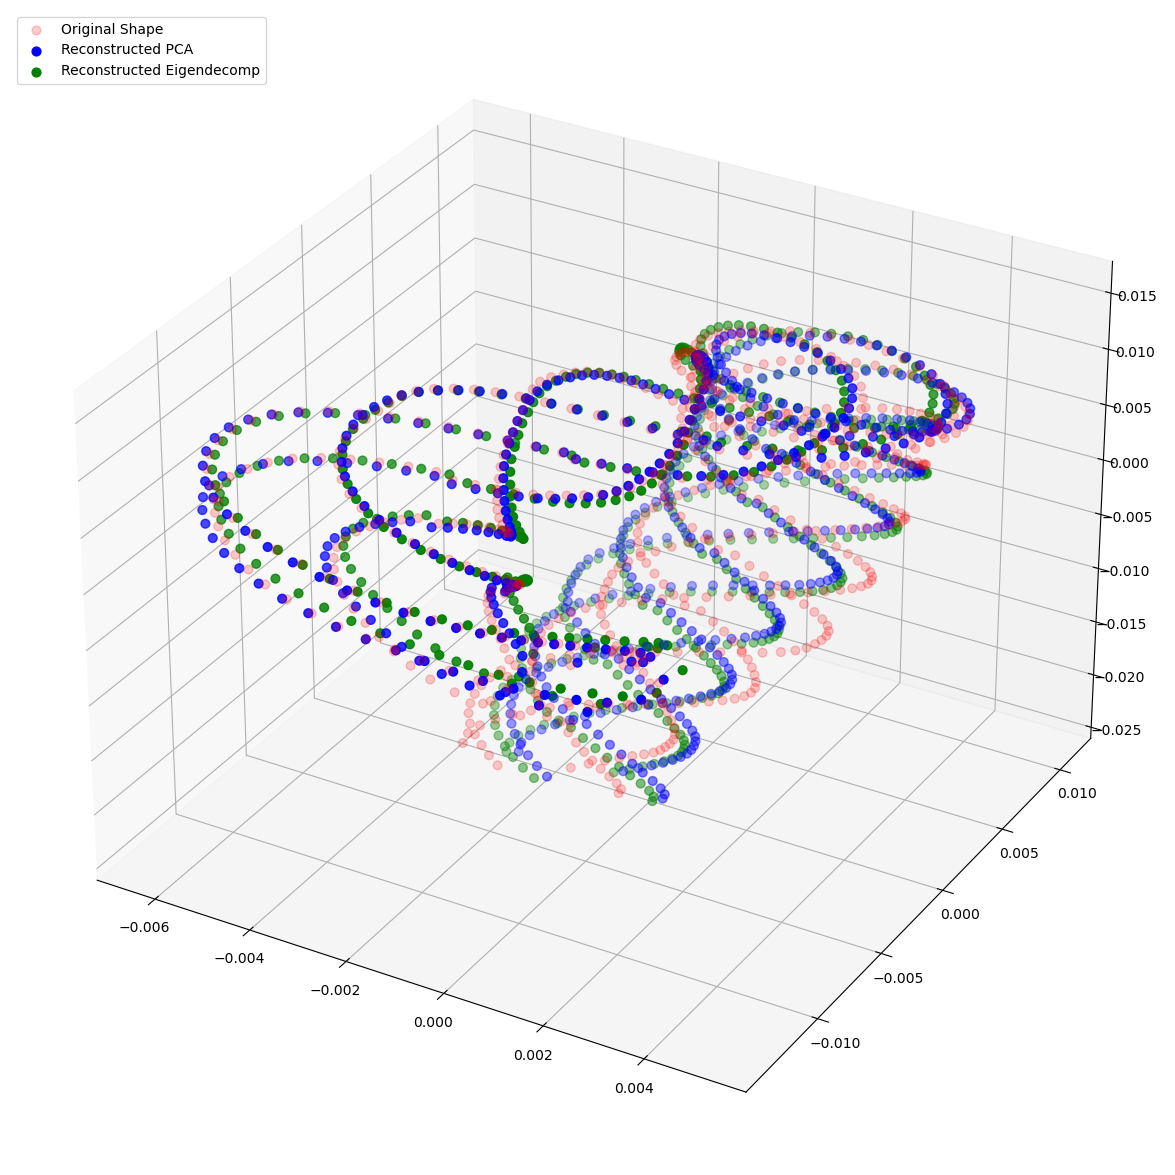

In [33]:
from mpl_toolkits.mplot3d import Axes3D

shape_selection=0

# Reconstruct through PCA
reconstructed_pca = pca.inverse_transform(pca_coordinates)
reshaped_array_pca = reconstructed_pca.reshape((7, -1, 3))
new_shape_pca = np.real(reshaped_array_pca[shape_selection])

#Reconstruct using Eigendecomposition
reconstructed_data_eigen = (np.dot(transformed_eigen.T, selected_eigenvectors)) + mu
recon_reshape_eigen = reconstructed_data_eigen.reshape((7,-1,3))
new_shape_eigen = np.real(recon_reshape_eigen[shape_selection])

#Reconstruct original shape
data_reshape = shape_array.T.reshape((7,-1,3))
shapes = np.real(data_reshape[shape_selection])

#Remove comment below to enable interactive plot.
#%matplotlib widget

fig = plt.figure(figsize=(15,15))
bx = Axes3D(fig)
bx = fig.add_subplot(111, projection='3d')
bx.scatter(shapes[:, 0], shapes[:, 1], shapes[:, 2],  c='r', marker='o', label='Original Shape', s=40, alpha =0.2) #original
bx.scatter(new_shape_pca[:, 0], new_shape_pca[:, 1], new_shape_pca[:, 2], c='b', marker='o', label='Reconstructed PCA', s=40) #pca
bx.scatter(new_shape_eigen[:, 0], new_shape_eigen[:, 1], new_shape_eigen[:, 2], c='g', marker='o',label='Reconstructed Eigendecomp', s=40) #eigen
plt.legend(loc="upper left")

#### If required, (been told by Marc at labs that it is not) the plot above can be made interactive by uncommenting the line containing the code '#%matplotlib widget'. This changes the backend of matplotlib and I would have enabled it but it ruins the plots below for the regression task.

#### Similarity
- It is clear that both shapes reconstructed by PCA and by eigendecomposition are more or less the same. To ensure they both still represent the original shape, that is also plotted above.
- There is a slight difference however which can be explained through the two methods calculating slightly differently. As the eigendecomposition was done mathematically using numpy it's possible the values differ slightly to PCA by scikitlearn which is optimised and correct.
- However both methods clearly show that the large majority of the data has remained even if some had been discarded during transformations.

#### Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.
- PCA is described as an approach to dimensionality reduction/data compression as it transforms a large set of data into a new set of uncorrelated variables called principal components. These principal components are ordered in terms of their importance and their variance. The dimensionality reduction/data compression comes from the discarding of the less important principal components. The final product is a new coordinate system which has significantly less dimensions but retains the majority of the useful information which is the main goal of data compression.

# 

# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

In [8]:
import os
import pandas as pd
import numpy as np


#Reading in training and target data
df_train_orig = pd.read_csv('./Training_data.csv')
df_target = pd.read_csv('./Training_data_targets.csv')
df_train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

#### 3.1 Null Data 
Null data points are present in the following:
- PctSomeCol18_24             (609/2438 present)
- PctEmployed16_Over          (2319/2438 present)
- PctPrivateCoverageAlone     (1955/2438 present)

#

array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>,
        <Axes: title={'center': 'povertyPercent'}>],
       [<Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>,
        <Axes: title={'center': 'PercentMarried'}>],
       [<Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctSomeCol18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>,
        <Axes: title={'center': 'PctBachDeg25_Over'}>],
       [<Axes: title={'center': 'PctEmployed16_Over'}>,
        <Axes: title={'ce

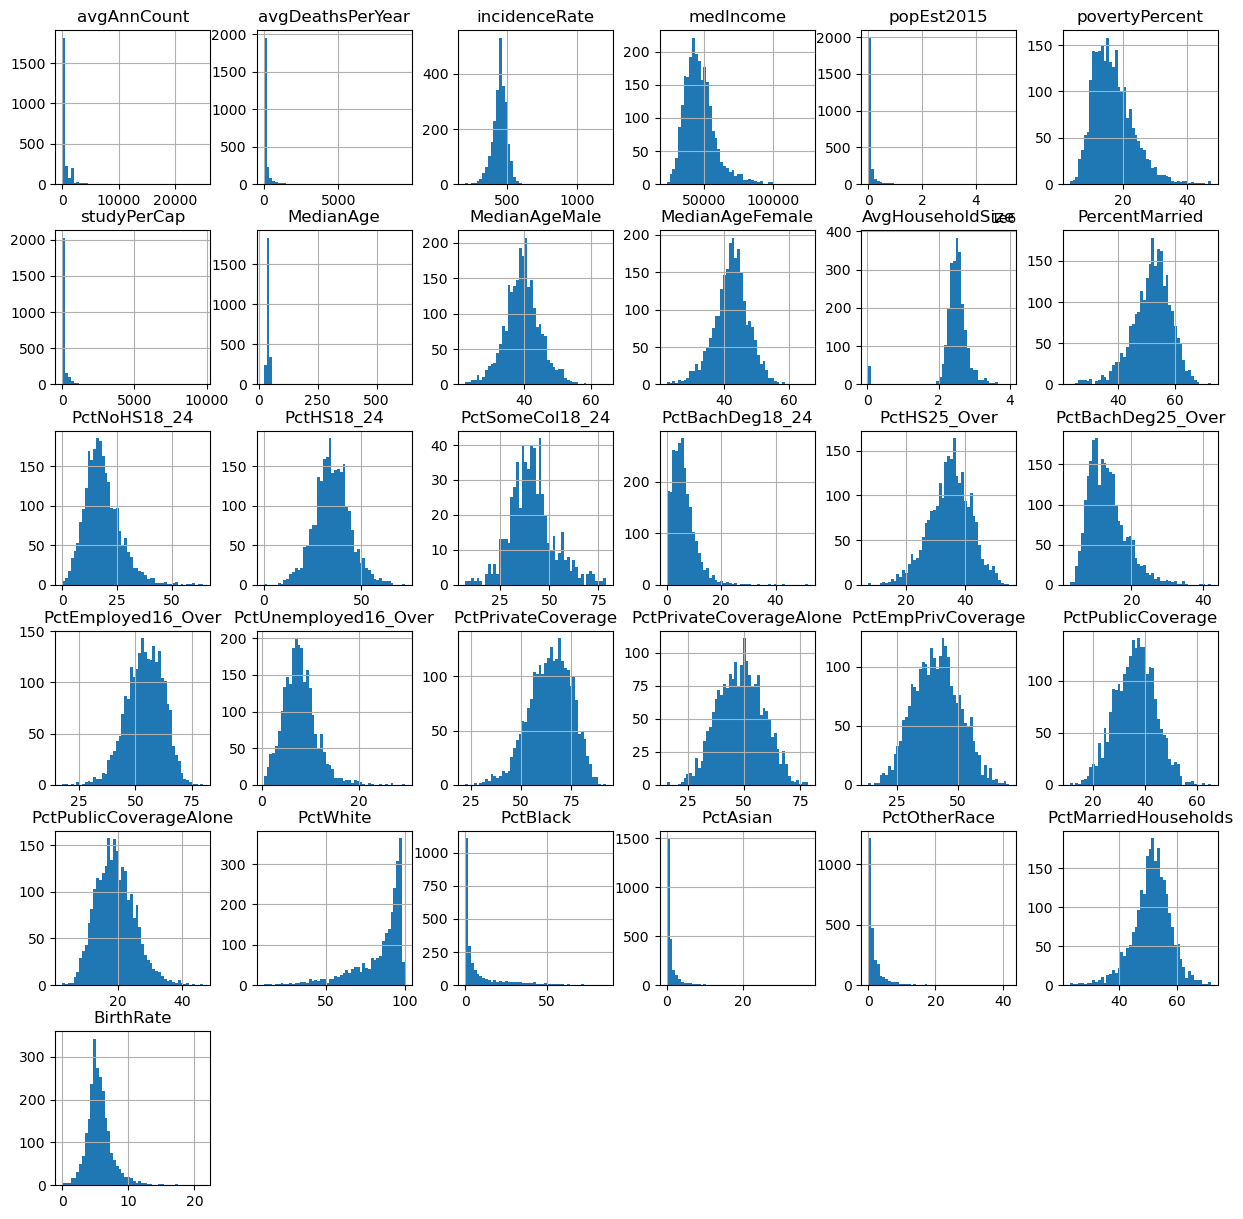

In [9]:
#Plotting histograms for each feature
df_train_orig.hist(bins=50,figsize=(15,15))


#### 3.1 Unusual Values

- There seems to be unusually high data in a few different measurements: 
    - 'avgAnnCount'
    - 'avgDeathsPerYear',
    - 'popEst2015',
    - 'studyPerCap' 
    - 'medianAge'. 
- The histograms show this for these features as there are huge differences in the scale on the x axis. However these may not all be outliers and could just be high, valid data as many counties are taken into consideration. For now the median age is the only one to be considered as it is definitely incorrect and will be considered before fitting a model.
- From exploration of the dataset, there are 17 rows in the dataset which have median age ranging from 400 up to 620. This is clearly wrong and will need correcting before fitting the model to the data.

*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

#

In [10]:
#Combine target and train data and then compute correlations
combined_data = pd.concat([df_train_orig, df_target], axis=1)
correlation_with_target = np.abs(combined_data.corr()['TARGET_deathRate']).sort_values(ascending=False)
print("Correlation of all features with the target variable: \n")
print(correlation_with_target)

Correlation of all features with the target variable: 

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRat

#### 3.1 Top 5 Correlated Features
Top 5 features with correlation to the target variable are:
- PctBachDeg25_Over          0.491411
- incidenceRate              0.443983
- PctPublicCoverageAlone     0.439734
- medIncome                  0.416607
- povertyPercent             0.413260
*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).

array([[<Axes: xlabel='incidenceRate', ylabel='incidenceRate'>,
        <Axes: xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='incidenceRate'>,
        <Axes: xlabel='medIncome', ylabel='incidenceRate'>,
        <Axes: xlabel='povertyPercent', ylabel='incidenceRate'>],
       [<Axes: xlabel='incidenceRate', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='PctBachDeg25_Over', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='medIncome', ylabel='PctBachDeg25_Over'>,
        <Axes: xlabel='povertyPercent', ylabel='PctBachDeg25_Over'>],
       [<Axes: xlabel='incidenceRate', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='PctBachDeg25_Over', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='PctPublicCoverageAlone', ylabel='PctPublicCoverageAlone'>,
        <Axes: xlabel='medIncome', ylabel='PctPublicCoverageAlone'>,
        <Axes: xl

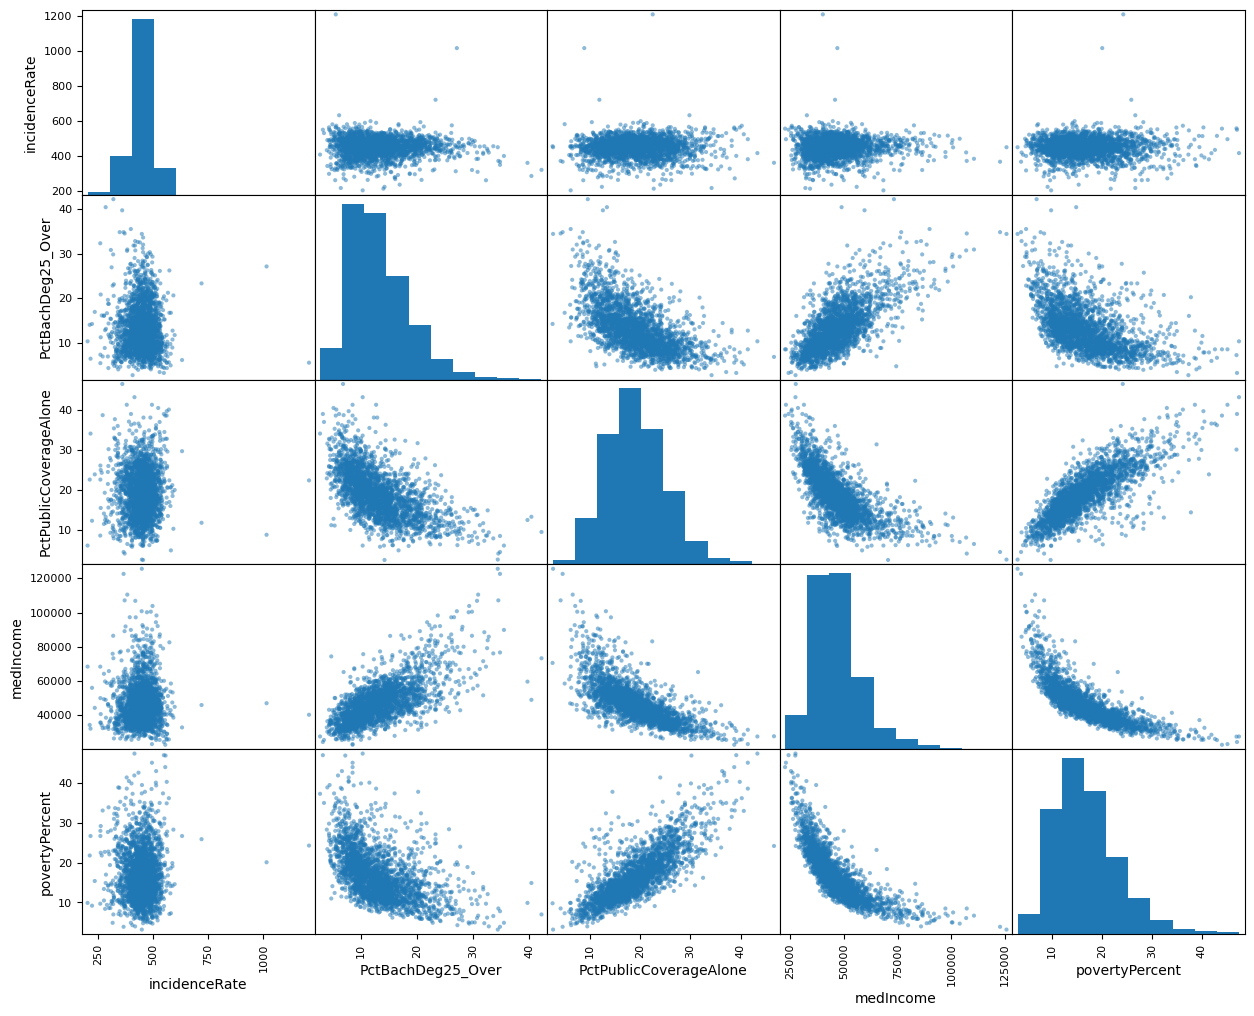

In [11]:
from pandas.plotting import scatter_matrix

#Plot the top 5 correlated features as scatter matrices.
attributes=["incidenceRate", "PctBachDeg25_Over", "PctPublicCoverageAlone", "medIncome", "povertyPercent"]
scatter_matrix(df_train_orig[attributes],figsize=(15,12))

#### 3.1 Correlation Matrices
*   medIncome and povertyPercent are negatively correlated to each other as you would expect. The higher the median income of a county leads to a lower percentage of people living in poverty.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. 

* (1.5 marks for discussion of at least two sets of features that show correlations and code above)

# 

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [12]:
#Removing column 'PctSomeCol18_24' due to insufficient data
df_train = df_train_orig.drop("PctSomeCol18_24",axis=1)

#### Removing columns
- Given the information we found above, it seems like this column 'PctSomeCol18_24' is missing a massive amount of data. 
- Only 609 records have something for this column out of the total 2438.
- By imputing this with a certain value, it doesn't seem useful since such a small fraction of the data has actual meaning and the majority is the median.
- Furthermore, I experimented with the models and found that removing this column actually proved to give better performing models for all 3 of the chosen regression models.
- It was also visible that the data in this column is not correlated closely to the target variable in any way.
- Finally, since it just represents the percentage that attended some college it is unlikely it'll be all that useful.

#

In [13]:
from sklearn.base import BaseEstimator
import pandas as pd
import numpy as np

#Custom transformer to set any values for median age above 100 to null
class MedianAgeNuller(BaseEstimator):
    
    def __init__(self):
        pass
     
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        median_age_ix = X.columns.get_loc('MedianAge')
        X_transformed = X.copy()
        X_transformed.loc[X_transformed.iloc[:, median_age_ix] > 100, 'MedianAge'] = np.nan
        return X_transformed.values if isinstance(X, pd.DataFrame) else X_transformed

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Split the feature and target sets into testing and training
features_train, features_test, target_train, target_test = train_test_split(df_train, df_target ,test_size = 0.3, random_state=42)
train = features_train
target = target_train

#Custom pipeline to transform the data easily
attribs = list(train)
full_pipeline = Pipeline([
    ('age_nuller',MedianAgeNuller()),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

#Transform the training data using the pipeline
train_prepared = full_pipeline.fit_transform(train)

#Convert back into pandas df and copy the original columns across
train_df = pd.DataFrame(train_prepared)
train_df.columns = attribs

## 3.2 Pre-Processing
To pre-process my data I have applied the following transformations:
- removed the column PctSomeCol18_24 due to lack of data.
- split the data in to 70% for training and 30% for testing.
- set any value of median age in the feature set above 100 to nan.
- impute all missing values in the feature set and apply the median in their place.
- apply the standard scaler transformer to normalise all feature data to a reasonable scale.
- converted the features back into a pandas dataframe with the original feature columns.

# 

**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

In [15]:
from sklearn.linear_model import LinearRegression

X = train_df
Y = target

#Fit the OLS linear regression model to the training data
lin_reg=LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error

deathRate_predictions = lin_reg.predict(X)
lin_mse=mean_squared_error(Y, deathRate_predictions)
lin_rmse=np.sqrt(lin_mse)
print("Root Mean Squared Error for OLS (Training): ", lin_rmse)
print("OLS Score (Training): ", lin_reg.score(X,Y))

Root Mean Squared Error for OLS (Training):  18.975733555343687
OLS Score (Training):  0.5268886476075273


In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_regression

#Perform cross-validation grid search to find best alpha value for lasso
lasso_reg = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.07, 0.075, 0.08, 0.1, 0.125, 0.15, 1, 10, 100]} 
grid_search = GridSearchCV(lasso_reg, param_grid, cv=10)
grid_search.fit(X, Y)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha Lasso:", best_alpha)

#Apply alpha value from experiment above to lasso model and test on training set
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X,Y)
lasso_predict = lasso_best.predict(X)
lin_mse_lasso=mean_squared_error(Y, lasso_predict)
lin_rmse_lasso=np.sqrt(lin_mse_lasso)
print("Root Mean Squared Error for Lasso (Training): ", lin_rmse_lasso)
print("Lasso Score (Training): ", lasso_best.score(X,Y))

Best alpha Lasso: 0.07
Root Mean Squared Error for Lasso (Training):  19.016044132748757
Lasso Score (Training):  0.5248764304113567


In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_regression

#Perform cross-validation grid search to find best alpha value for ridge
ridge_reg = Ridge()
param_gridr = {'alpha': [0.001, 0.1, 10, 20, 30, 35, 40, 50, 60, 70, 100]} 
grid_searchr = GridSearchCV(ridge_reg, param_gridr, cv=10)
grid_searchr.fit(X, Y)
best_alphar = grid_searchr.best_params_['alpha']
print("Best alpha Ridge:", best_alphar)

#Apply alpha value from experiment above to ridge model and test on training set
ridge_best = Ridge(alpha=best_alphar)
ridge_best.fit(X,Y)
ridge_predict = ridge_best.predict(X)
lin_mse_ridge=mean_squared_error(Y, ridge_predict)
lin_rmse_ridge=np.sqrt(lin_mse_ridge)
print("Root Mean Squared Error for ridge (Training): ", lin_rmse_ridge)
print("Ridge Score (Training): ", ridge_best.score(X,Y))

Best alpha Ridge: 35
Root Mean Squared Error for ridge (Training):  19.023324621150916
Ridge Score (Training):  0.524512548859976


In [19]:
from sklearn.model_selection import cross_val_score


#Perform cross validation and find the scores for each model

def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
    
    
lin_scores = cross_val_score(lin_reg, X,Y,scoring="neg_mean_squared_error",cv=5)
linreg_rmse_scores = np.sqrt(-lin_scores)

lasso_scores = cross_val_score(lasso_best, X,Y,scoring="neg_mean_squared_error",cv=5)
lasso_rmse_scores = np.sqrt(-lasso_scores)

ridge_scores = cross_val_score(ridge_best, X,Y,scoring="neg_mean_squared_error",cv=5)
ridge_rmse_scores = np.sqrt(-ridge_scores)


print("Cross Validation Scores for Linear Regression:")
display_scores(linreg_rmse_scores)

print("\n\nCross Validation Scores for Lasso Regression:")
display_scores(lasso_rmse_scores)

print("\n\nCross Validation Scores for Ridge Regression:")
display_scores(ridge_rmse_scores)

Cross Validation Scores for Linear Regression:
Scores: [20.60539455 17.85688512 20.68708576 19.82804823 19.53079007]
Mean: 19.701640746451993
Standard deviation: 1.023344024325522


Cross Validation Scores for Lasso Regression:
Scores: [20.52602582 17.81883641 20.47506611 19.8964236  19.52208132]
Mean: 19.647686651560754
Standard deviation: 0.9877627661867843


Cross Validation Scores for Ridge Regression:
Scores: [20.56502395 17.77841108 20.42245203 19.8954237  19.541409  ]
Mean: 19.64054395165655
Standard deviation: 1.000837027089949


In [20]:
#Apply pipeline to unseen test data to pre-process it
features_test_transformed = pd.DataFrame(full_pipeline.fit_transform(features_test))
features_test_transformed.columns = attribs

#Test OLS on unseen test data and find RMSE and R^2
test_predict_linreg = lin_reg.predict(features_test_transformed)
test_lin_mse=mean_squared_error(target_test, test_predict_linreg)
test_lin_rmse=np.sqrt(test_lin_mse)
r_squared_lin = lin_reg.score(features_test_transformed, target_test)
print("Root Mean Squared Error for OLS on unseen data: ", round(test_lin_rmse,5))
print("R Squared for OLS on unseen test data: ", round(r_squared_lin,5))

#Test lasso model on unseen test data and find RMSE and R^2
test_predict_lasso = lasso_best.predict(features_test_transformed)
test_lasso_mse=mean_squared_error(target_test, test_predict_lasso)
test_lasso_rmse=np.sqrt(test_lasso_mse)
r_squared_lasso = lasso_best.score(features_test_transformed, target_test)
print("\n Root Mean Squared Error for Lasso on unseen data: ", round(test_lasso_rmse,5))
print("R Squared for Lasso on unseen test data: ", round(r_squared_lasso,5))

#Test ridge model on unseen test data and find RMSE and R^2
test_predict_ridge = ridge_best.predict(features_test_transformed)
test_ridge_mse=mean_squared_error(target_test, test_predict_ridge)
test_ridge_rmse=np.sqrt(test_ridge_mse)
r_squared_ridge = ridge_best.score(features_test_transformed, target_test)
print("\n Root Mean Squared Error for Ridge on unseen data: ", round(test_ridge_rmse,5))
print("R Squared for Ridge on unseen test data: ", round(r_squared_ridge,5))

Root Mean Squared Error for OLS on unseen data:  18.94238
R Squared for OLS on unseen test data:  0.52131

 Root Mean Squared Error for Lasso on unseen data:  18.91013
R Squared for Lasso on unseen test data:  0.52294

 Root Mean Squared Error for Ridge on unseen data:  18.92371
R Squared for Ridge on unseen test data:  0.52226


# 

#### 3.3
#### Regularisation
- Regularisation is the desensitisation of the model on the training set. I have applied Lasso and Ridge regularisation to the model and it seems to have improved performance compared to the original OLS approach. This is due to the OLS approach creating a massively complex linear model which may have problems with generalising. Regularisation introduces a bias to help mitigate the higher order polynomials and simplify the model making it less likely to overfit to the training data.

#### Choosing Regularisation Weights
- The regularisation weights for both the Lasso and Ridge models were obtained through performing a grid search on each model with a range of parameters.
- This is a cross-validation technique which takes a grid of parameters and exhaustsively trains the model using each parameter.
- There will then be a computation to find the best parameter and in this case alpha.
- Each time the grid search found a best value for this parameter, I set the grid closer to this number to converge more towards the best possible value.
- By doing grid search on both the Lasso and Ridge model I found an alpha parameter of **0.07** and **35** respectively and applied each to each model when training.

#### Final Quantitive Comparison Of Models
- I have compared the performance of all 3 models with two seperate performance metrics that measure different things.
- All of these final metrics are calculated with the unseen test data to give valid results and a true measure of the performance of each model.
- I have used **Root Mean Squared Error** (RMSE) and **R Squared** score as my metric as seen in the code above.
##### RMSE
- RMSE measures the average difference between the predicted values and given labels. In this case it is the average difference in the amount of mortalities predicted by the model compared to the actual mortality amount given.
- It gives an estimate of how well the model can predict an accurate target value. (accuracy)
- When calculating the RMSE of each of the models, they all gave pretty similar scores which were low, showing that they performed really well generally.
##### R Squared
- This measurement gives the variance of the target variable that is described by the predictor variables as a percentage.
- Gives an estimate of how well the model has fit the data. Higher is better.
- Each of the models once again reported around the same value in this metric which was around 0.52 or 52%. 
- In this case the R squared percentage tells us how much of the variation in the cancer mortality rates (target) can be explained by taking all of the features in to consideration.

| Model       | RMSE          | R Squared  |
| ----------- | -----------   |---------   |
| OLS         | 18.942        |0.521       |
| Lasso       | **18.910**        |**0.523**       |
| Ridge       | 18.924        |0.522      |

#### Best Performance - Lasso
- On both comparison using RMSE and R squared, the **Lasso** regression model narrowly performs better than Ridge and Ordinary Least Squares. 
- Lasso has a **lower** RMSE showing that the model gives the most accurate predictions based on the test data.
- Lasso also gave a slightly **higher** R Squared than both other models showing it fit closest to the data.
- To conclude, given all of the data calculated, the Lasso regualrised model performs the best in predicting the cancer mortality rates in counties in the US given the features described.
